In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
df=pd.read_csv('BankChurners.csv')

In [3]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

Rectangle(xy=(-0.4, 0), width=0.4, height=4072, angle=0)
Rectangle(xy=(0.6, 0), width=0.4, height=4428, angle=0)
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=697, angle=0)
Rectangle(xy=(1, 0), width=0.4, height=930, angle=0)


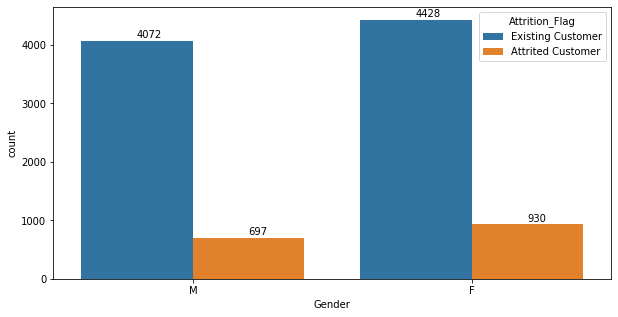

In [7]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=df.Gender,hue=df.Attrition_Flag)
for p in plot.patches:
    print(p)
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
plt.show()

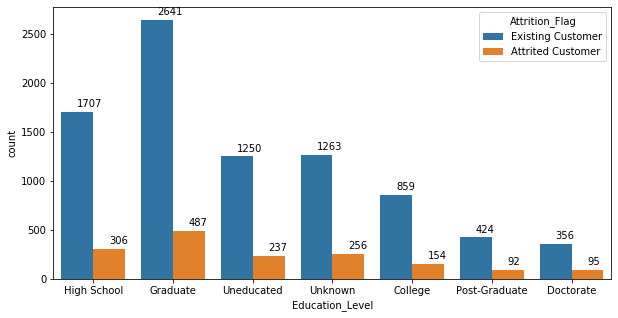

In [8]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=df.Education_Level,hue=df.Attrition_Flag)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))#plt.xticks(rotation=90)
plt.show()

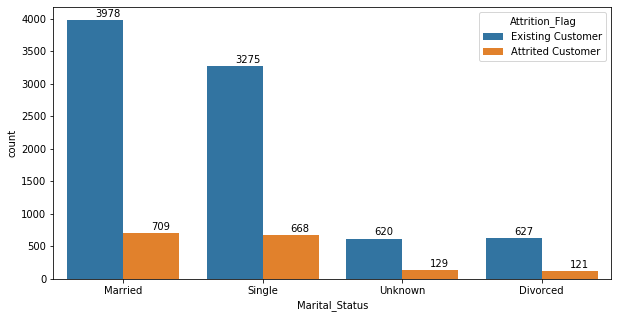

In [9]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=df.Marital_Status,hue=df.Attrition_Flag)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
plt.show()

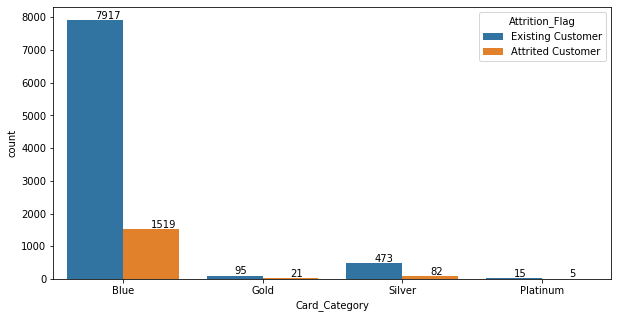

In [10]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=df.Card_Category,hue=df.Attrition_Flag)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
plt.show()

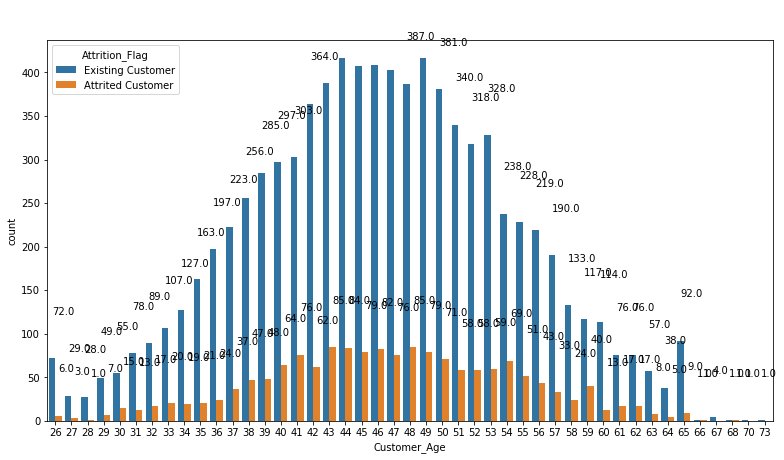

In [11]:
plt.figure(figsize=(13,7))
plot=sns.countplot(x=df.Customer_Age,hue=df.Attrition_Flag)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
#plt.xticks(rotation=90)
plt.show()

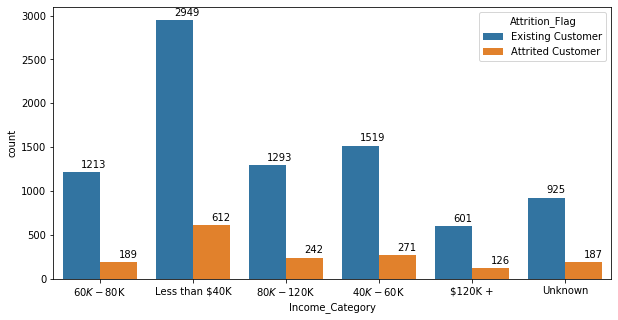

In [12]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=df.Income_Category,hue=df.Attrition_Flag)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
plt.show()

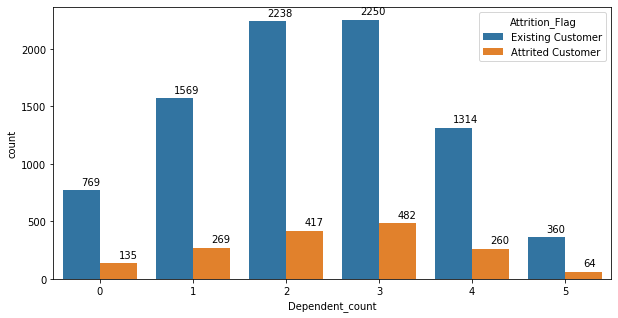

In [13]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=df.Dependent_count,hue=df.Attrition_Flag)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
plt.show()

In [14]:
df['Attrition_Flag'].replace({'Existing Customer':0, 'Attrited Customer':1},inplace=True)
df.drop(df.columns[[0,-1,-2]].values,axis=1,inplace=True)
print(df.head(2))
print(df.shape)

   Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0               0            45      M                3     High School   
1               0            49      F                5        Graduate   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144   

In [15]:
map_education_level = {'High School':1,'Graduate':3,'Uneducated':0,'College':2,'Post-Graduate':4,'Doctorate':5}
map_income_level = {'$60K - $80K':3,'Less than $40K':1, '$80K - $120K':4,'$40K - $60K':2,'$120K +':5}
map_card_category = {'Blue':1,'Gold':3,'Silver':2,'Platinum':4}
df['Education_Level'].replace(map_education_level,inplace=True)
df['Income_Category'].replace(map_income_level,inplace=True)
df['Card_Category'].replace(map_card_category,inplace=True)

#
# #hot encoding of gender category
df.insert(2,'Gender_M',df['Gender'],True)
df.rename({'Gender':'Gender_F'},axis=1,inplace=True)
df['Gender_M'].replace({'M':1,'F':0},inplace=True)
df['Gender_F'].replace({'M':0,'F':1},inplace=True)
#
# #hot encoding of marital status
df.insert(7,'Single',df['Marital_Status'],True)
df.insert(7,'Divorced',df['Marital_Status'],True)
df.insert(7,'Unknown',df['Marital_Status'],True)
df.rename({'Marital_Status':'Married'},axis=1,inplace=True)
df['Married'].replace({'Single':0, 'Married':1, 'Divorced':0, 'Unknown':0},inplace=True)
df['Single'].replace({'Single':1, 'Married':0, 'Divorced':0, 'Unknown':0},inplace=True)
df['Divorced'].replace({'Single':0, 'Married':0, 'Divorced':1, 'Unknown':0},inplace=True)
df['Unknown'].replace({'Single':0, 'Married':0, 'Divorced':0, 'Unknown':1},inplace=True)

In [16]:
educatedDF = df.loc[df['Education_Level']!='Unknown']
# # print(educatedDF['Education_Level'].skew())
# # sbn.displot(educatedDF,x='Education_Level')
# # plt.show()
# # print(educatedDF['Education_Level'].mean())
# # print(educatedDF['Education_Level'].median())
# # print(educatedDF['Education_Level'].mode())
# # df['Unknown_Edu'] = np.where(df['Education_Level']=='Unknown',1,0)
mean_education = educatedDF['Education_Level'].mean()
df['Education_Level'].replace({'Unknown':mean_education},inplace=True)
#
salariedDF = df.loc[df['Income_Category']!='Unknown']
# # sbn.displot(salariedDF,x='Income_Category')
# # plt.show()
# # print(salariedDF['Income_Category'].mean())
# # print(salariedDF['Income_Category'].median())
# # print(salariedDF['Income_Category'].mode())
# # print(salariedDF['Income_Category'].skew())
# # df['Unknown_Salary'] = np.where(df['Income_Category']=='Unknown',1,0)
median_salaries = salariedDF['Income_Category'].median()
df['Income_Category'].replace({'Unknown':median_salaries},inplace=True)

In [17]:
x = df.iloc[:,1:]
y = df.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [18]:
# #__________Naive Bayes______________
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_predict = gnb.predict(x_test)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[2653  148]
 [ 228  313]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2801
           1       0.68      0.58      0.62       541

    accuracy                           0.89      3342
   macro avg       0.80      0.76      0.78      3342
weighted avg       0.88      0.89      0.88      3342

